In [1]:
#dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
import time
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [2]:

engine = create_engine("sqlite:///hawaii3.sqlite")

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [3]:

Measurements = Base.classes.measurement
Stations = Base.classes.station

In [4]:
#Create a session

session = Session(engine)

In [5]:
try1 = session.query(Measurements).filter_by(station="USC00519397")
print(try1[0].station, try1[0].date, try1[0].tobs)

USC00519397 2010-01-01 65.0


In [6]:
start_date="2018-05-05"
end_date="2018-05-13"

In [7]:

convert_start_date=start_date.replace("-"," ")

convert_end_date=end_date.replace("-"," ")
print(convert_start_date)

2018 05 05


In [8]:
official_start = datetime.date(datetime.strptime(convert_start_date, "%Y %m %d"))
official_end = datetime.date(datetime.strptime(convert_end_date, "%Y %m %d"))

In [9]:
print(official_end-official_start)

8 days, 0:00:00


In [10]:
print(official_start)

2018-05-05


In [11]:
twelve_m_ago=datetime.date(datetime.today())
#twelve_m_ago=twelve_m_ago.replace(year=(twelve_m_ago.year-1))
twelve_m_ago=twelve_m_ago.replace(year=(twelve_m_ago.year-1))
print(twelve_m_ago)

2017-05-01


In [12]:
simple_prcp=pd.DataFrame(session.query(Measurements.date,Measurements.prcp).order_by(Measurements.date).all())


In [13]:
simple_prcp["date"].head()

0    2010-01-01
1    2010-01-01
2    2010-01-01
3    2010-01-01
4    2010-01-01
Name: date, dtype: object

In [14]:
# for row in range(len(simple_prcp)):
#     better_date=simple_prcp.loc[row,"date"].replace("-"," ")
#     simple_prcp.loc[row,"date"]=datetime.date(datetime.strptime(better_date, "%Y %m %d"))
#     #print(simple_prcp.loc[row,"date"])

In [15]:
recent = pd.DataFrame(session.query(Measurements.date,Measurements.prcp).filter(Measurements.date>=twelve_m_ago).order_by(Measurements.date).all())
recent=recent.set_index("date",drop=True)

In [16]:
recent.head()

,prcp
date,
2017-05-01,0.26
2017-05-01,0.07
2017-05-01,0.03
2017-05-01,0.07
2017-05-01,0.13


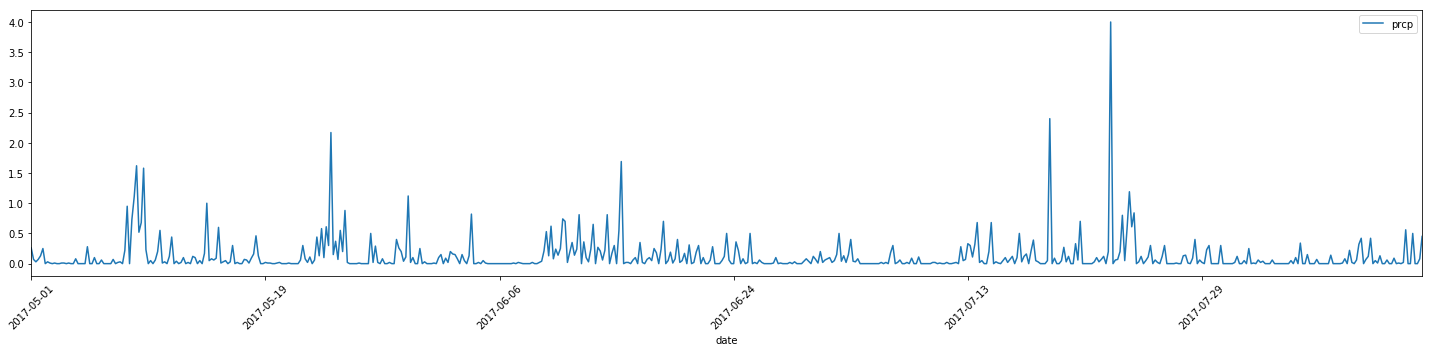

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
recent.plot(x_compat=True,figsize=(20,5))

# Rotate the xticks for the dates
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()

In [18]:
x_axis=recent.index
print(x_axis[0::30])

Index(['2017-05-01', '2017-05-06', '2017-05-11', '2017-05-17', '2017-05-23',
       '2017-05-28', '2017-06-03', '2017-06-08', '2017-06-13', '2017-06-18',
       '2017-06-24', '2017-06-29', '2017-07-06', '2017-07-11', '2017-07-16',
       '2017-07-21', '2017-07-26', '2017-07-31', '2017-08-08', '2017-08-16'],
      dtype='object', name='date')


In [19]:
# ##INSERT CHART
# #fail
# import datetime
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import matplotlib.cbook as cbook

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')

# #x_axis=recent.index
# #fig, ax = plt.subplots(sharex=True)
# ax=recent.plot(kind="bar", figsize=(20,3),xticks=None,title="Precipitation")#.set_xticklabels(recent.index[0::30], rotation=45)#.set_xticklabels(x_axis, rotation=45)#[1::30]

# ax.set_xticklabels(recent.index[0::30])
# #labels = recent.index[0::30]
# #ax.set_xlabel("Date")
# #ax.set_ylabel("Precipitation")
# #plt.setp(ax.get_xticklabels()[::30], visible=False)
# # round to nearest months...
# #datemin = np.datetime64(recent.index[0], 'm')
# #datemax = np.datetime64(recent.index[-1], 'm') 
# #ax.set_xlim(datemin, datemax)
# #datemin=recent.index[0]
# #datemax=recent.index[(-1)]
# #ax.set_xlim(datemin,datemax)

# # format the ticks
# #ax.xaxis.set_minor_locator(months)
# #ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m'))

# #plt.MaxNLocator(6)
# #ax.set_major_locator(plt.MaxNLocator(3))
# #plt.MaxNLocator(3)
# #ax.set_ylim=([0, recent.max()+0.25])
# #ax.ylim=([0, recent.max()+0.25])
# #fig=recent.plot(kind="bar")
# #ax.grid(True)

In [20]:

# plt.show()

In [21]:
# #Millionth try
# #fail
# import datetime
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import matplotlib.cbook as cbook



# # Load a numpy record array from yahoo csv data with fields date, open, close,
# # volume, adj_close from the mpl-data/example directory. The record array
# # stores the date as an np.datetime64 with a day unit ('D') in the date column.
# #with cbook.get_sample_data('goog.npz') as datafile:
# #    r = np.load(datafile)['price_data'].view(np.recarray)

# fig, ax = plt.subplots()
# #ax.plot(recent.index, recent.prcp)
# #ax = recent.plot(kind='bar', y='prcp')
# ax=recent.plot(kind="bar", rot=45, figsize=(20,3), grid=True, title="Precipitation",xticks=None)#.set_xticklabels(recent.index, rotation=0)
# ax.set_xlabel("Date")
# ax.set_ylabel("Precipitation")

# # format the ticks
# #ax.xaxis.set_major_locator(years)
# #ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m'))

# # round to nearest years...
# datemin = np.datetime64(recent.index[0], 'm')
# #datemax = np.datetime64(recent.index[-1], 'Y') + np.timedelta64(1, 'Y')
# datemax = np.datetime64(recent.index[-1], 'm') 
# ax.set_xlim(datemin, datemax)


# # format the coords message box
# #def price(x):
# #    return '$%1.2f' % x
# #ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# #ax.format_ydata = price
# ax.grid(True)

# # rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them
# #fig.autofmt_xdate()

# plt.show()

In [22]:
# #fail
# n = 10

# ax = recent.plot(kind='bar', y='prcp')
# #ticks = ax.xaxis.get_ticklocs()
# ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
# #ax.xaxis.set_ticks(ticks[::n])
# ax.xaxis.set_ticklabels(ticklabels[::n])

# plt.show()
# #ax.figure.show()

In [23]:
###
#STATION ANALYSIS
###

In [24]:
#Find total number of stations


total_stations = session.query(Stations).count()
print(total_stations)

9


In [25]:
#Most active stations
#Misunderstanding. Thought tobs=total observations.
#Will save command for future reference as the sum function is nice
#active_stations = session.query(Measurements.station,func.sum(Measurements.tobs)).\
#    group_by(Measurements.station).order_by(func.sum(Measurements.tobs).desc()).all() 
#active_stations

In [26]:
#Most active stations, descending order
active_stations = session.query(Measurements.station,func.count(Measurements.tobs)).\
    group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).all() 
active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [27]:
#The station with the highest obs will now be the first since we did descending order
most_obs = active_stations[0].station
print(most_obs)

USC00519281


In [28]:
try1 = session.query(Measurements).filter_by(station="USC00519397")
print(try1[0].station, try1[0].date, try1[0].tobs)

USC00519397 2010-01-01 65.0


In [29]:
prolific_station=pd.DataFrame(session.query(Measurements.station,Measurements.tobs).\
    filter(Measurements.station==most_obs).all() )
prolific_station.head()

,station,tobs
0,USC00519281,70.0
1,USC00519281,62.0
2,USC00519281,74.0
3,USC00519281,75.0
4,USC00519281,74.0


In [30]:
recent_mostobs = pd.DataFrame(session.query(Measurements.date,Measurements.tobs).filter(Measurements.date>=twelve_m_ago).\
    filter(Measurements.station==most_obs).order_by(Measurements.date).all())


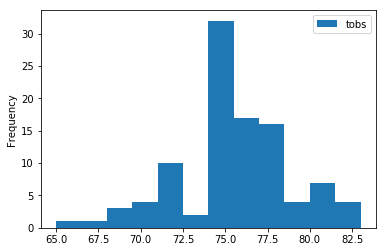

In [31]:
recent_mostobs.plot(kind="hist",bins=12)

plt.show()

In [32]:
def calc_temps(start, end):
    convert_start_date=start.replace("-"," ")
    convert_end_date=end.replace("-"," ")
    official_start = datetime.date(datetime.strptime(convert_start_date, "%Y %m %d"))
    official_end = datetime.date(datetime.strptime(convert_end_date, "%Y %m %d"))
    start_year_ago=official_start.replace(year=(official_start.year-1))
    end_year_ago=official_end.replace(year=(official_end.year-1))
    #print(end,convert_end_date,official_end,end_year_ago)
    
    stats=dict()
    stats["min"]=session.query(func.min(Measurements.tobs)).filter(Measurements.date >= start_year_ago).\
                                filter(Measurements.date <= end_year_ago)
    stats["max"]=session.query(func.max(Measurements.tobs)).filter(Measurements.date >= start_year_ago).\
                                filter(Measurements.date <= end_year_ago)
    stats["avg"]=session.query(func.avg(Measurements.tobs)).filter(Measurements.date >= start_year_ago).\
                                filter(Measurements.date <= end_year_ago)
    return stats

In [33]:
#stats = calc_temps("2011-05-01","2011-06-22")
stats=calc_temps(start_date,end_date)
my_min=list(stats["min"][0])[0]
my_max=list(stats["max"][0])[0]
my_avg=list(stats["avg"][0])[0]
print(my_min, my_max, my_avg)

66.0 80.0 75.20408163265306


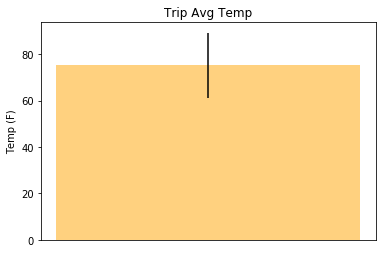

In [34]:
fig, ax = plt.subplots()
xpos = 1
y_error = my_max-my_min

bar = ax.bar(xpos, my_avg, yerr=y_error, alpha=0.5, color='orange', align="center")
ax.set( xticks=range(xpos), title="Trip Avg Temp", ylabel="Temp (F)")
plt.show()

In [35]:
#Flask section

In [39]:
##Sample Flask processes
# 1. import Flask
from flask import Flask, jsonify

# 2. Create an app, being sure to pass __name__
app = Flask(__name__)


# 3. Define what to do when a user hits the index route
#plain "/" is just home
# Query for the dates and temperature observations from the last year.
# Convert the query results to a Dictionary using date as the key and tobs as the value.
# Return the json representation of your dictionary.

@app.route("/api/date_temps")
def d_t():
    #Return a dict of temps with dates as the key
    results = session.query(Measurements.date,Mesaurements.tobs).all()

    # Create a dictionary from the row data and append to a list of all_passengers
    t_d_dict = []
    for row in results:
        date=row.date
        temp=row.temp
        individ_dict = {}
        individ_dict[date] = temp
        t_d_dict.append(individ_dict)
    return jsonify(t_d_dict)




#Return a json list of stations from the dataset.

@app.route("/api/stations")
def station_names():
    #List the station data
    station_list=[]
    results=session.query(Stations.station_name).all()
    for row in results:
        name=row.station_name
        station_list.append(name)
    return jsonify(station_list)




#Return a json list of Temperature Observations (tobs) for the previous year

@app.route("/api/tobs")
def last_year_tobs():
    #list of last year's tobs--not dictionary, just plain list
    twelve_m_ago=datetime.date(datetime.today())
    twelve_m_ago=twelve_m_ago.replace(year=(twelve_m_ago.year-1))
    lastyear_temps=[]
    results=session.query(Measurements.tobs).filter(Measurements.date>=twelve_m_ago).order_by(Measurements.date).all()
    for row in results:
        lastyear_temps.append(row.tobs)
    return jsonify(lastyear_temps)
    


# Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
# When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
# When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

@app.route("/api/<start>")
def temp_calc_start():
    stats=calc_temps(start,datetime.today())

    my_min=list(stats["min"][0])[0]
    my_max=list(stats["max"][0])[0]
    my_avg=list(stats["avg"][0])[0]
    return jsonify(my_min, my_max, my_avg)

@app.route("/api/<start>/<end>")
def temp_calc_range():
    stats=calc_temps(start,end)

    my_min=list(stats["min"][0])[0]
    my_max=list(stats["max"][0])[0]
    my_avg=list(stats["avg"][0])[0]
    return jsonify(my_min, my_max, my_avg)


if __name__ == '__main__':
    app.run(debug=True)

 * Restarting with stat


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
